In [17]:
import matplotlib.pyplot as plt
import pandas as pd
import scienceplots as sp
plt.style.use('science')

In [18]:
import matplotlib.pyplot as plt
import datetime

def plot_data(file):
        data = pd.read_excel(file)
        data['First seen'] = pd.to_datetime(data['First seen'])
        data['Last seen'] = pd.to_datetime(data['Last seen'])
        new_links_per_day = data.groupby('First seen').size()
        lost_links_per_day = data.groupby('Last seen').size()
        cumulative_new_links = new_links_per_day.cumsum()
        cumulative_lost_links = lost_links_per_day.cumsum()
        net_cumulative_backlinks = cumulative_new_links - cumulative_lost_links
        net_cumulative_backlinks = net_cumulative_backlinks.interpolate()
        fig, axs = plt.subplots(2, 1, figsize=(12, 12))

        # Plotting the bar chart
        axs[0].bar(new_links_per_day.index, new_links_per_day.values,
                        label='New Links', alpha=0.7)
        axs[0].bar(lost_links_per_day.index, lost_links_per_day.values,
                        label='Lost Links', alpha=0.7)
        axs[0].set_title('Historical Backlink Changes', fontsize=20)
        axs[0].set_xlabel('Date', fontsize=20)
        axs[0].set_ylabel('Number of Links', fontsize=20)
        legend = axs[0].legend()
        for text in legend.get_texts():
                text.set_fontsize(20)
        axs[0].grid(True)
        axs[0].set_xlim([datetime.datetime(2023, 1, 1), max(max(new_links_per_day.index), max(lost_links_per_day.index))])

        # Plotting the cumulative trends
        axs[1].plot(cumulative_new_links.index,
                                cumulative_new_links.values, label='Cumulative New Links')
        axs[1].plot(cumulative_lost_links.index,
                                cumulative_lost_links.values, label='Cumulative Lost Links')
        axs[1].plot(net_cumulative_backlinks.index,
                                net_cumulative_backlinks.values, label='Net Cumulative Backlinks')
        axs[1].set_title('Cumulative Backlink Trends', fontsize=20)
        axs[1].set_xlabel('Date', fontsize=20)
        axs[1].set_ylabel('Cumulative Number of Links', fontsize=20)
        legend = axs[1].legend()
        for text in legend.get_texts():
                text.set_fontsize(20)
        axs[1].grid(True)
        axs[1].set_xlim([datetime.datetime(2023, 1, 1), max(max(cumulative_new_links.index), max(cumulative_lost_links.index), max(net_cumulative_backlinks.index))])

        plt.ylim(0, None)

        plt.tight_layout()
        plt.show()

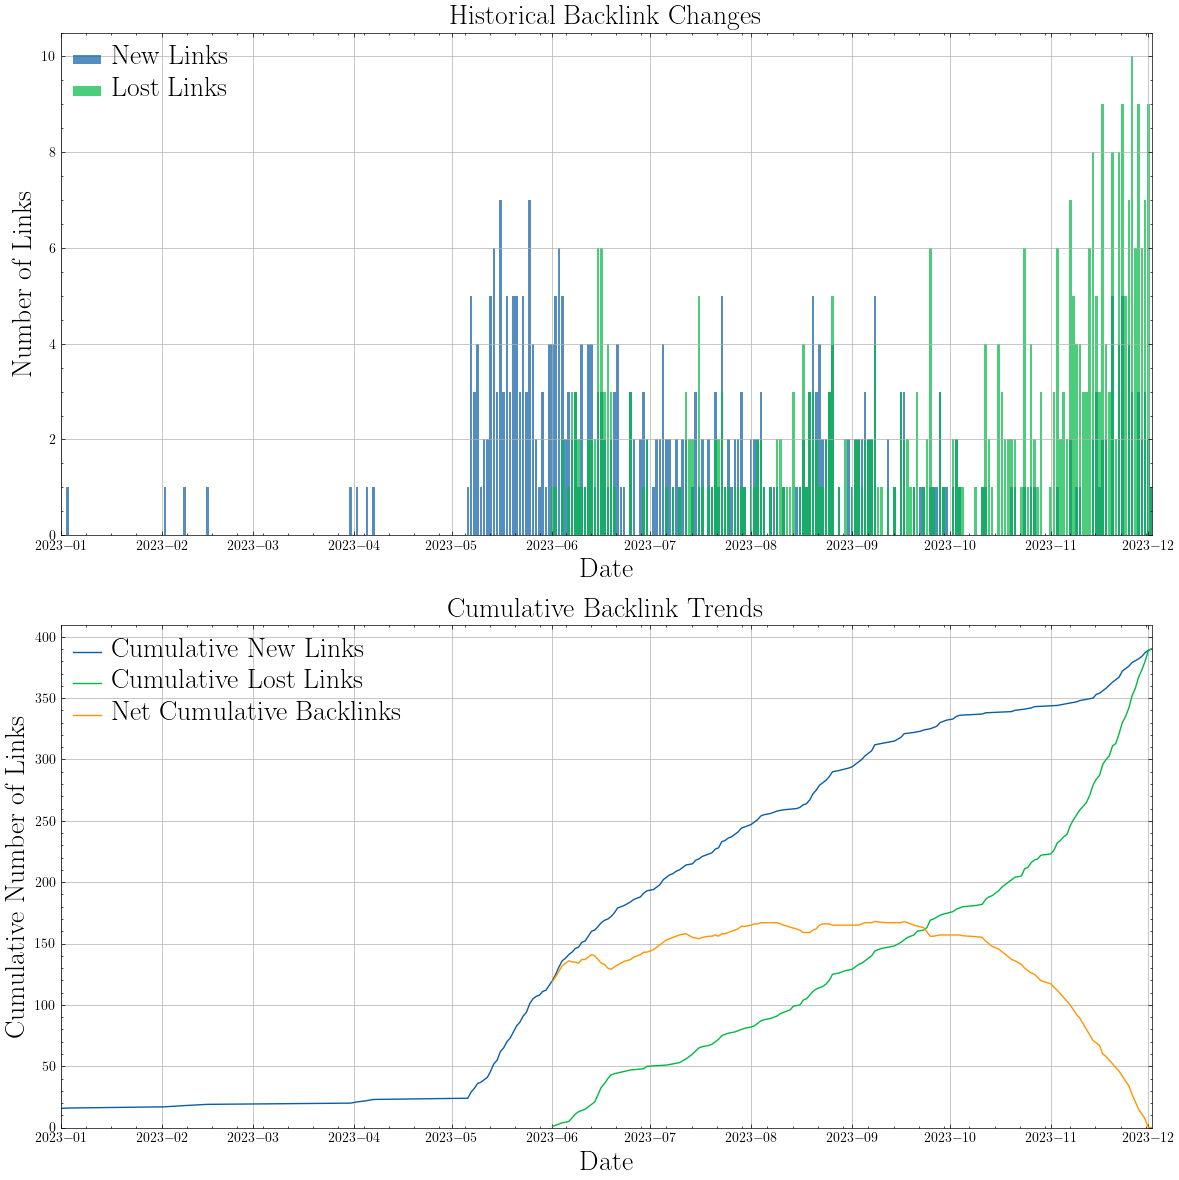

In [19]:
plot_data('data/all.xlsx')

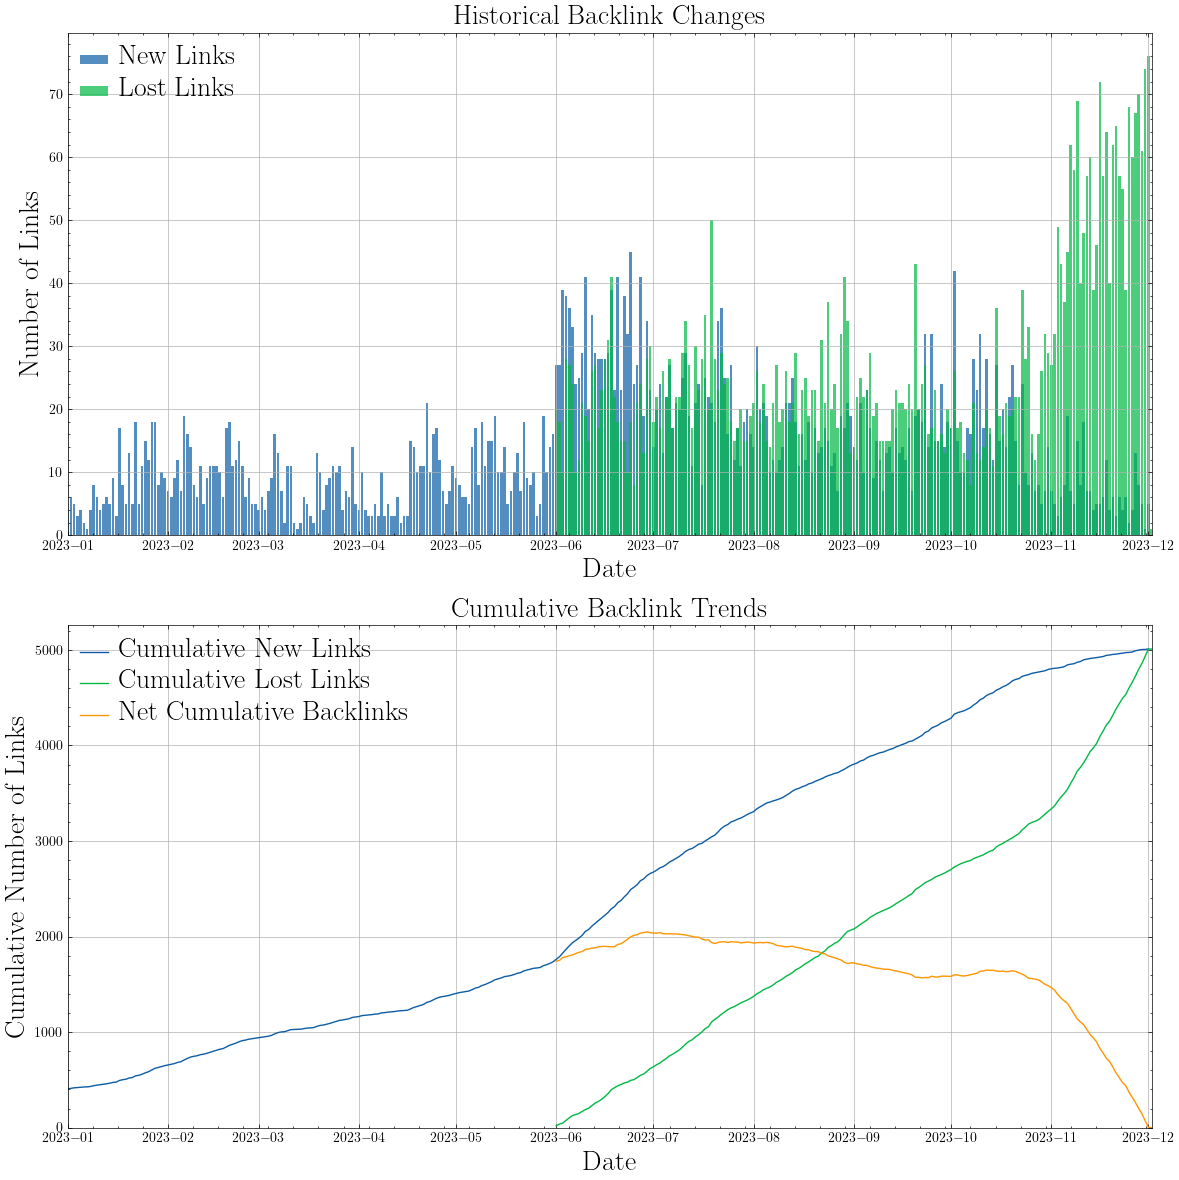

In [20]:
plot_data('data/petermckinnon.com-backlinks.xlsx')

    # Set x-axis start date to 2023-1-1axs[0].set_xlim(pd.to_datetime('2023-01-01'), axs[0].get_xlim()[1]) axs[1].set_xlim(pd.to_datetime('2023-01-01'),axs[1].get_xlim()[1])